In [47]:
# Import libraries
from PIL import Image

# Load image
image1 = Image.open('90_img_.png')
image2 = Image.open('604_img_.png')
image3 = Image.open('704_img_.png')
image4 = Image.open('858_img_.png')
image5 = Image.open('906_img_.png')

## Gamma Correction

## Analyzing the image by plotting the histograms

In [48]:
from matplotlib import pyplot as plt
def plot_histogram(image):
    imageR, imageG, imageB = image.split()
    plt.figure(figsize = (10, 10))
    plt.subplot(2, 1, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(2, 1, 2)
    plt.title("Histogram of image")
    plt.plot(imageR.histogram(), color='red') 
    plt.plot(imageG.histogram(), color='green')
    plt.plot(imageB.histogram(), color='blue')
    plt.show()

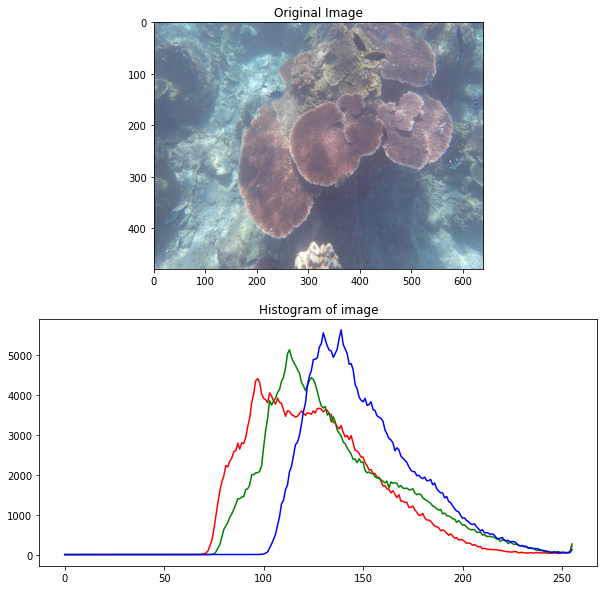

In [49]:
plot_histogram(image1)

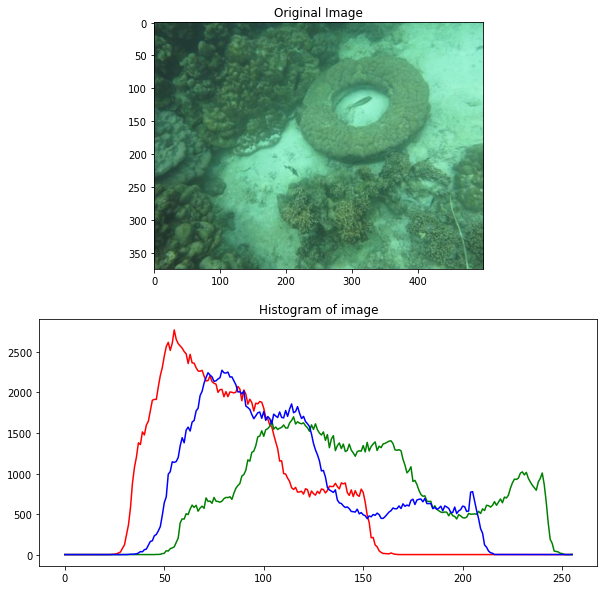

In [50]:
plot_histogram(image2)

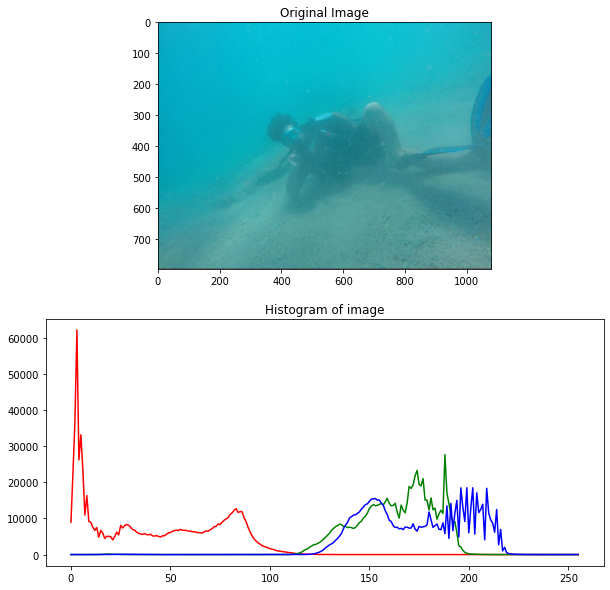

In [51]:
plot_histogram(image3)

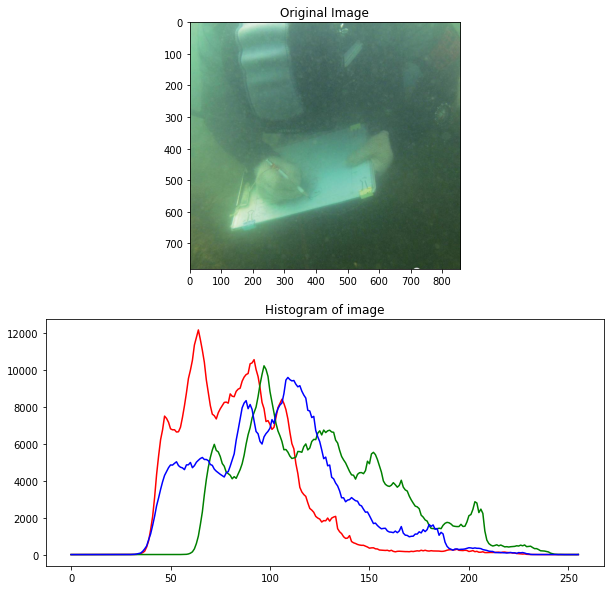

In [52]:
plot_histogram(image4)

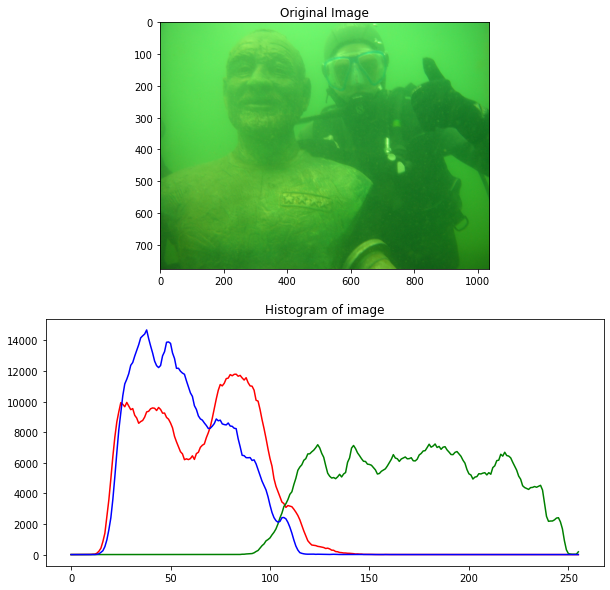

In [53]:
plot_histogram(image5)

## Perform Gaussian smoothing 

In [54]:
from PIL import ImageFilter
def gaussian_smoothing(image):
    smoothed_image = image.filter(ImageFilter.GaussianBlur)
    
    return smoothed_image

In [55]:
smoothed_image1 = gaussian_smoothing(image1)
smoothed_image2 = gaussian_smoothing(image2)
smoothed_image3 = gaussian_smoothing(image3)
smoothed_image4 = gaussian_smoothing(image4)
smoothed_image5 = gaussian_smoothing(image5)

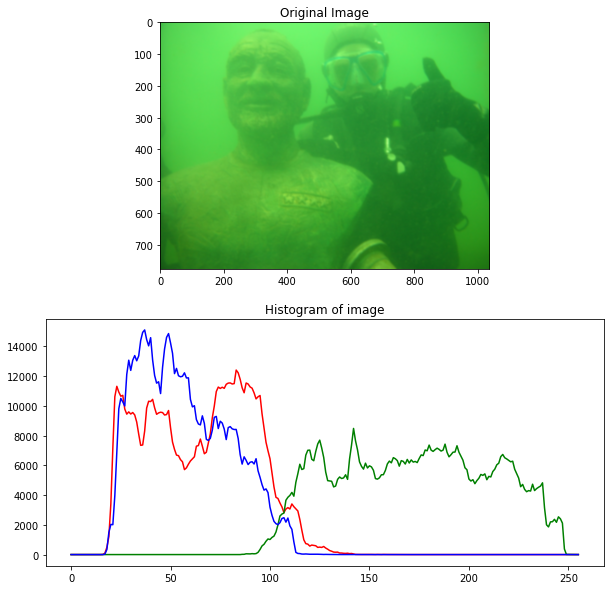

In [56]:
plot_histogram(smoothed_image5)

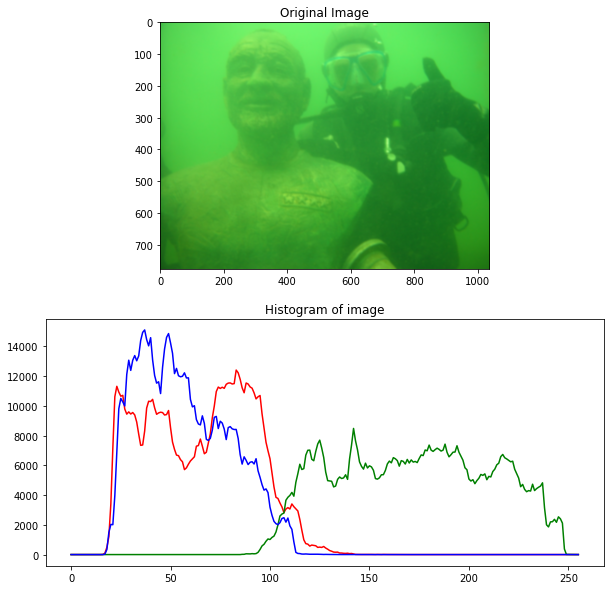

In [57]:
plot_histogram(smoothed_image5)

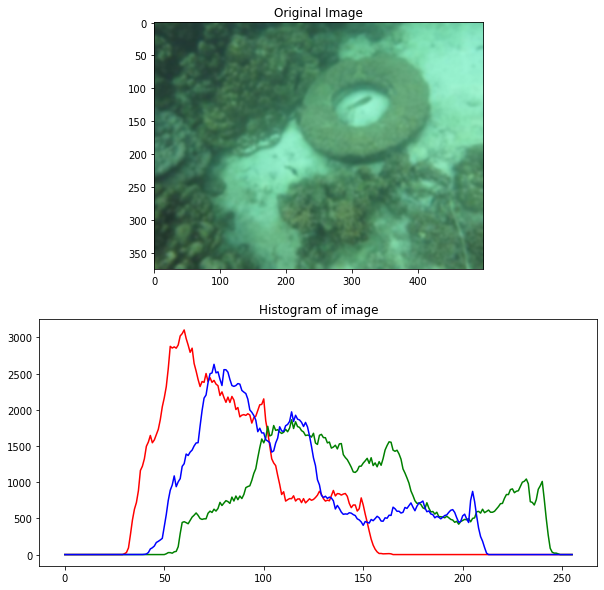

In [58]:
plot_histogram(smoothed_image2)

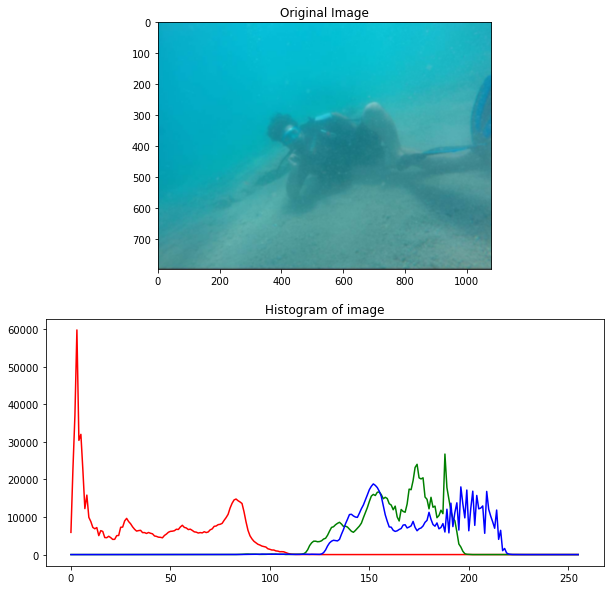

In [59]:
plot_histogram(smoothed_image3)

## Histogram equalization

In [60]:
from PIL import ImageOps
import numpy as np

def histogram_equalization(image):
    imageR, imageG, imageB = image.split()
    er = ImageOps.equalize(imageR, mask = None)
    eg = ImageOps.equalize(imageG, mask = None)
    eb = ImageOps.equalize(imageB, mask = None)
    x, y = image.size
    equalIm = np.zeros((y, x, 3), dtype = "uint8")
    equalIm[:, :, 0]=er;
    equalIm[:, :, 1]=eg;
    equalIm[:, :, 2]=eb;
    
    plt.figure(figsize = (20, 20))
    
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(2, 2, 2)
    plt.imshow(equalIm)
    
    plt.subplot(2, 3, 4)
    plt.title("Histogram of image")
    plt.plot(er.histogram(), color='red') 
    plt.subplot(2, 3, 5)

    plt.plot(eg.histogram(), color='green')
    plt.subplot(2, 3, 6)

    plt.plot(eb.histogram(), color='blue')
    plt.show()

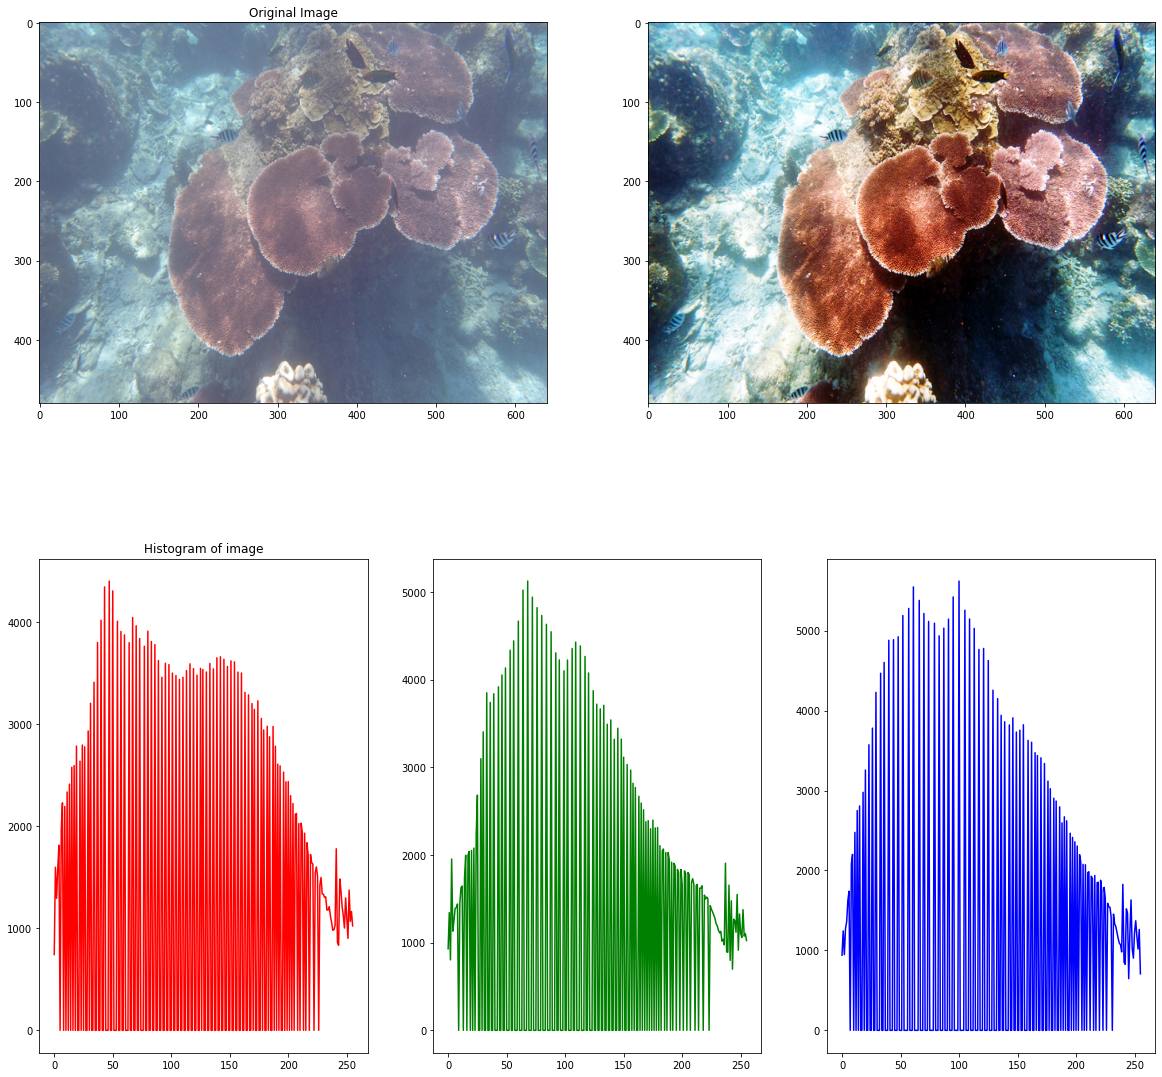

In [61]:
histogram_equalization(image1)

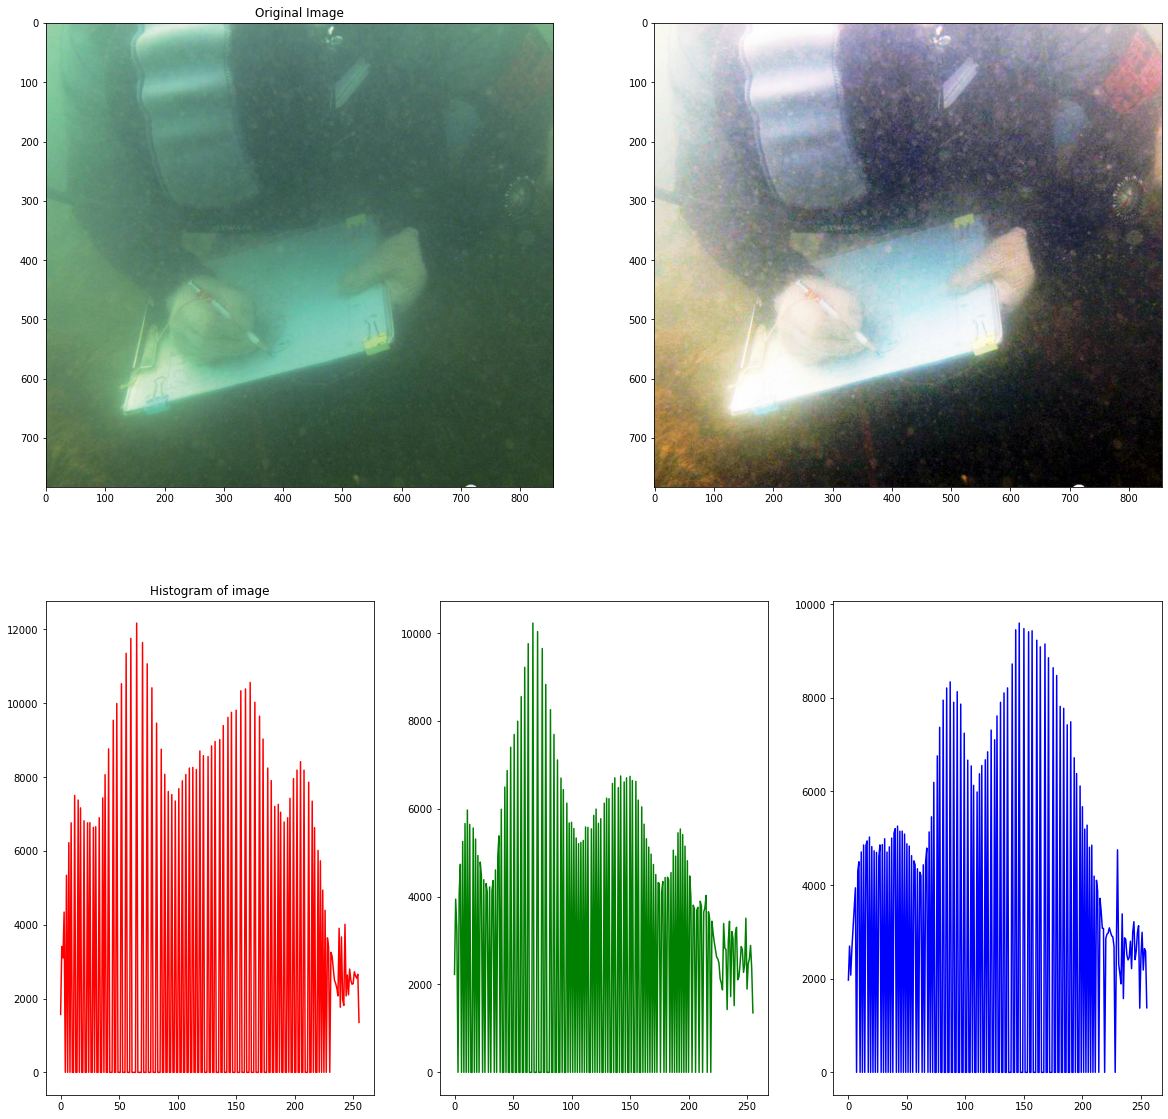

In [62]:
histogram_equalization(image4)

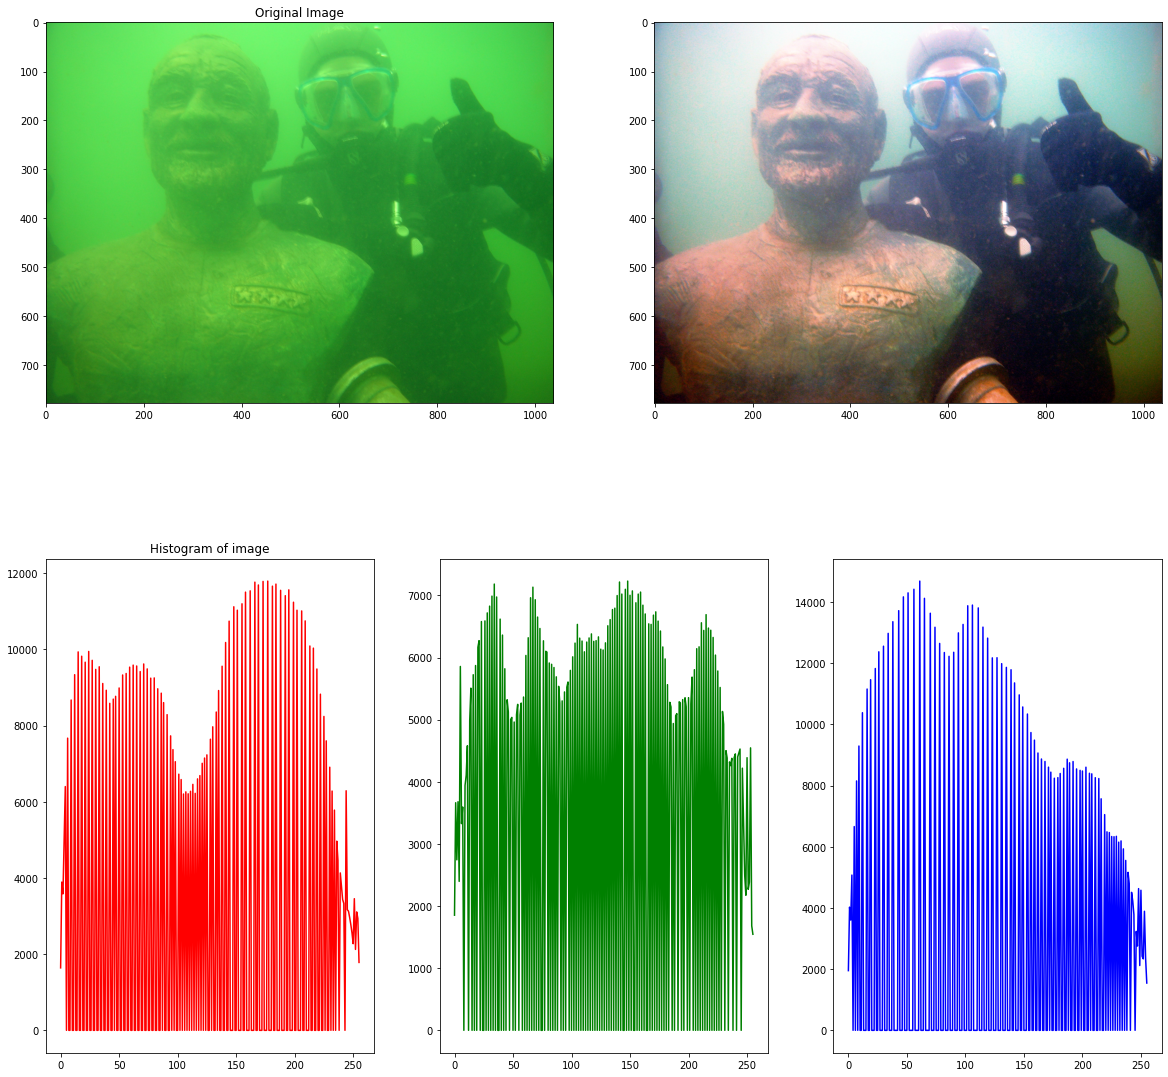

In [63]:
histogram_equalization(image5)

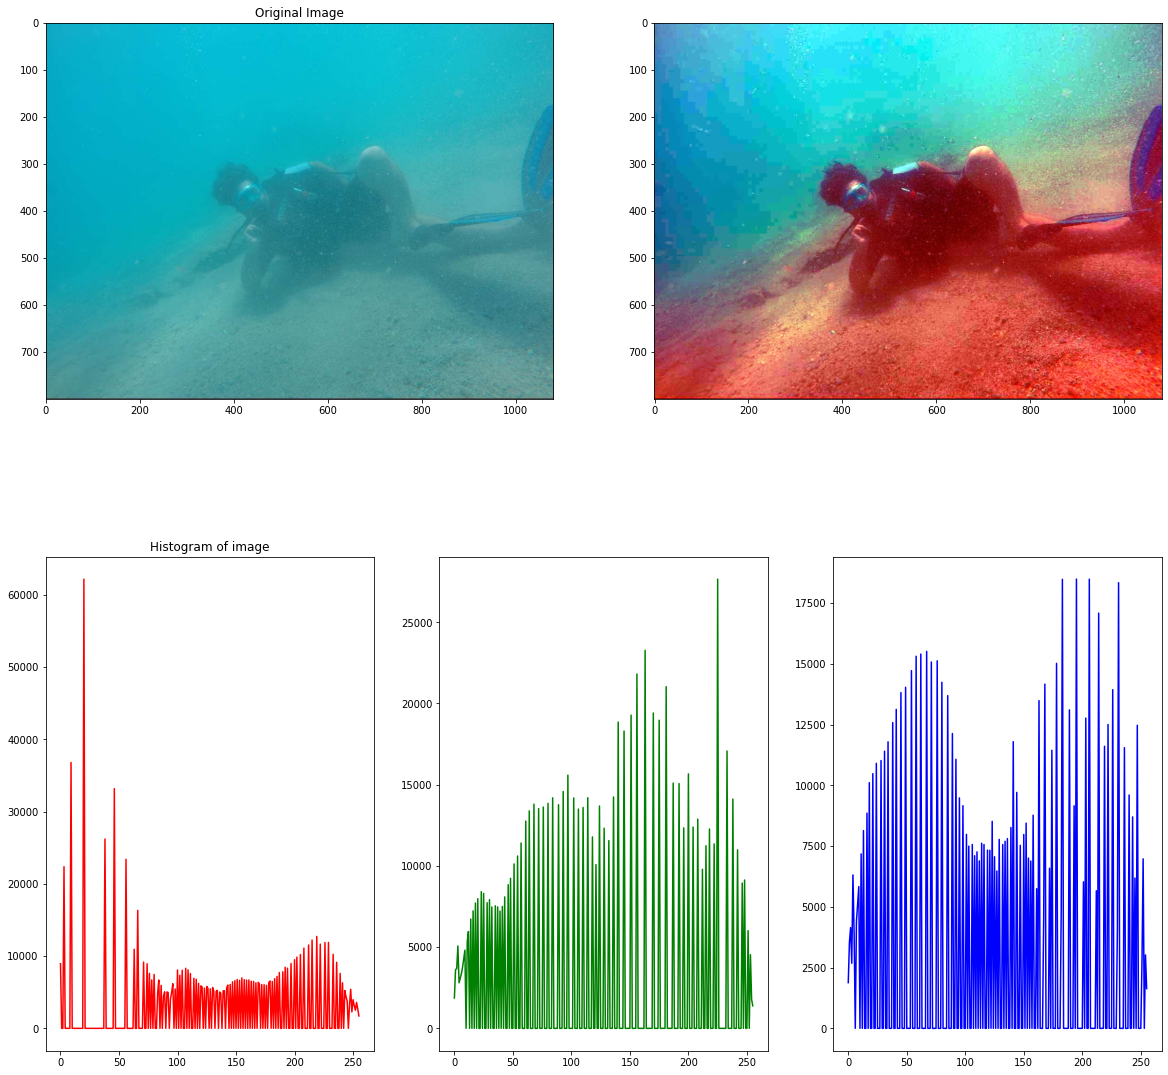

In [64]:
histogram_equalization(image3)

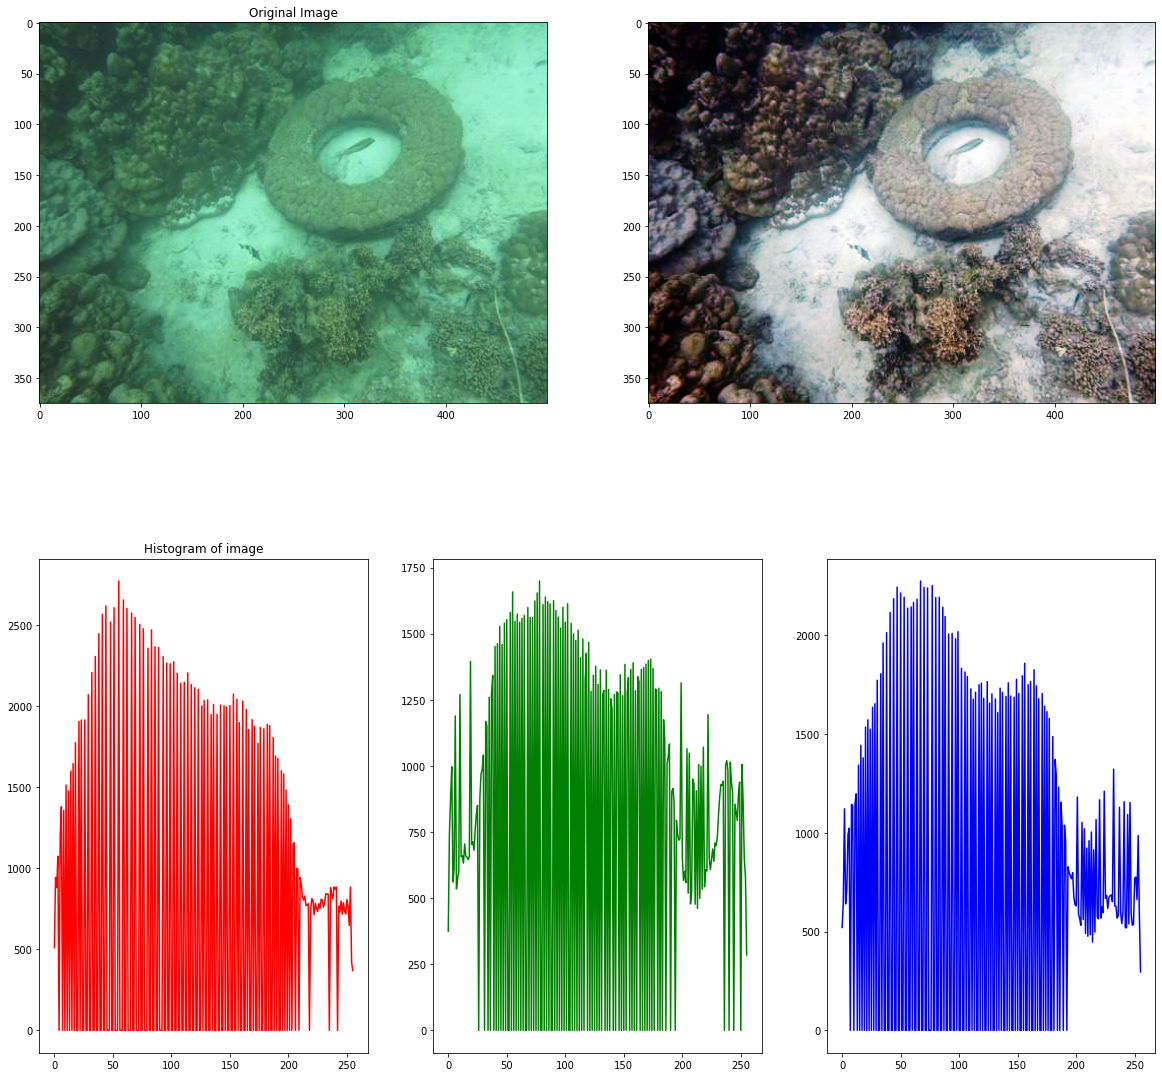

In [65]:
histogram_equalization(image2)

## RGB to HSV, Global Equalisation

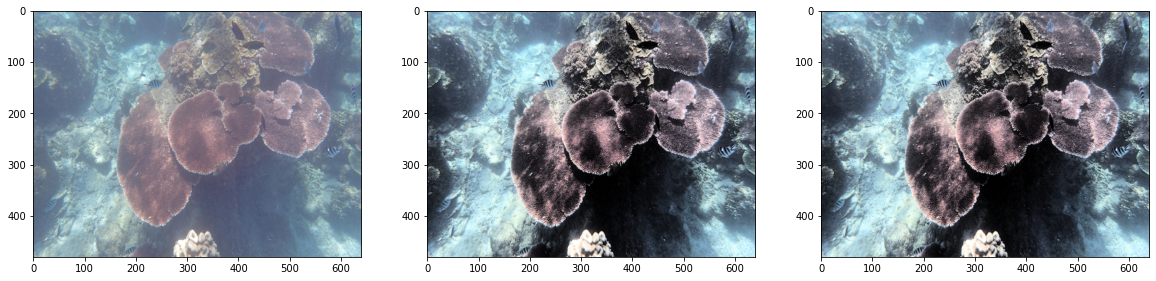

In [68]:
# Import libraries
from PIL import Image, ImageOps

# Load image
image1 = Image.open('90_img_.png')
image2 = Image.open('604_img_.png')
image3 = Image.open('704_img_.png')
image4 = Image.open('858_img_.png')
image5 = Image.open('906_img_.png')

plt.figure(figsize = (20, 20))
hsvimage1 = image1.convert('HSV')
# In HSV 
plt.subplot(1, 3, 1)
plt.imshow(hsvimage1)

Hue, Saturation, Value = hsvimage1.split()
eValue = ImageOps.equalize(Value, mask = None)

x, y = image1.size
equalIm = np.zeros((y, x, 3), dtype = "uint8")
equalIm[:, :, 0]= Hue;
equalIm[:, :, 1]= Saturation;
equalIm[:, :, 2]= eValue;
hsvimage1 = Image.fromarray(equalIm, 'HSV') 

# HSV After Equalisation
plt.subplot(1, 3, 2)
plt.imshow(hsvimage1)

rgbimage1 = hsvimage1.convert('RGB')
# In RGB
plt.subplot(1, 3, 3)
plt.imshow(rgbimage1)